In [0]:
!apt install swig cmake libopenmpi-dev zlib1g-dev > /dev/null 2>&1
!pip install stable-baselines==2.4.0 box2d box2d-kengz > /dev/null 2>&1

In [0]:
import itertools as it
from skimage import color
import os
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
all_actions = np.array([k for k in it.product([-1, 0, 1], [1, 0], [0.2, 0])])
print(all_actions)
print(len(all_actions))

[[-1.   1.   0.2]
 [-1.   1.   0. ]
 [-1.   0.   0.2]
 [-1.   0.   0. ]
 [ 0.   1.   0.2]
 [ 0.   1.   0. ]
 [ 0.   0.   0.2]
 [ 0.   0.   0. ]
 [ 1.   1.   0.2]
 [ 1.   1.   0. ]
 [ 1.   0.   0.2]
 [ 1.   0.   0. ]]
12


In [31]:
import gym

env = gym.make("CartPole-v1")
dim_act = env.action_space.n
print(dim_act)

env2 = gym.make("CarRacing-v0")
dim_act2 = env2.action_space.low
print(dim_act2)
print(env2.action_space)
print(env2.action_space.dtype)
print(env2.action_space.high)
print(env2.action_space.low)
print(env2.action_space.contains)
print(env2.action_space.sample)
print("")
print(env2.action_space.shape)
print(env2.action_space)

2


ModuleNotFoundError: ignored

# image rgbtogray


In [9]:
from google.colab import files

files.upload()

Saving example.jpg to example.jpg


{'example.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x13\x12\x15\x13\x12\x12\x15\x16\x15\x15\x18\x18\x18\x18\x18\x15\x18\x18\x17\x18\x17\x18\x15\x17\x17\x17\x17\x15\x15\x16\x18\x1d( \x18\x1a%\x1d\x15\x15!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1b\x10\x10\x1b-%\x1e%--------------------------------------------------\xff\xc0\x00\x11\x08\x00\xc2\x01\x03\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x01\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x01\x03\x05\x06\x02\x07\xff\xc4\x00?\x10\x00\x01\x03\x02\x03\x05\x06\x05\x03\x01\x08\x00\x07\x00\x00\x00\x01\x00\x02\x11\x03!\x041A\x05\x12Qaq"\x81\x91\xa1\xb1\xf0\x06\x132\xc1\xd1BR\xe1\x14#br\x82\xa2\xb2\xd2\xf1\x07\x15\x163Sc\x92\xff\xc4\x00\x1b\x01\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x002\x11\x00\x02\x02\x01\x03\x02\x03\x06\x05\x04\x03\x00\x00\x00\x00\x00\x00\x01\x02\x0

In [0]:
image = io.imread('example.jpg')

In [0]:
def process_image(obs):
  return color.rgb2gray(obs)

def process_image_2(obs):
  return 2 * color.rgb2gray(obs)

def process_image_2ne1(obs):
  return 2 * color.rgb2gray(obs) - 1.0

In [0]:
image2 = process_image(image)
image3 = process_image_2(image)
image4 = process_image_2ne1(image)

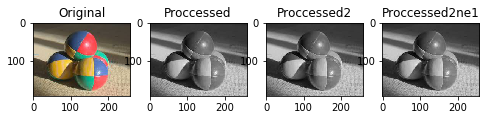

In [17]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(8, 4.5))
ax1.set_title("Original")
ax1.imshow(image)
ax2.set_title("Proccessed")
ax2.imshow(image2, cmap=plt.cm.gray)
ax3.set_title("Proccessed2")
ax3.imshow(image3, cmap=plt.cm.gray)
ax4.set_title("Proccessed2ne1")
ax4.imshow(image4, cmap=plt.cm.gray)


In [19]:
print(np.mean(image))
print(np.mean(image2))
print(np.mean(image3))
print(np.mean(image4))

154.02305158524635
0.6033177233746512
1.2066354467493023
0.20663544674930254


# get random action

In [0]:
def get_random_action(gas_actions):
    """
    Here random actions prefer gas to break
    otherwise the car can never go anywhere.
    """
    action_weights = 14.0 * gas_actions + 1.0
    action_weights /= np.sum(action_weights)

    return np.random.choice(dim_actions, p=action_weights)

In [0]:
dim_actions = 12

In [0]:
action_weights = 14.0 * gas_actions + 1.0
print(action_weights)
action_weights /= np.sum(action_weights)
print(action_weights)

[ 1. 15.  1.  1.  1. 15.  1.  1.  1. 15.  1.  1.]
[0.01851852 0.27777778 0.01851852 0.01851852 0.01851852 0.27777778
 0.01851852 0.01851852 0.01851852 0.27777778 0.01851852 0.01851852]


In [0]:
for i in range(20):
    print(get_random_action(gas_actions))

9
9
5
1
4
4
9
1
1
3
9
5
1
10
5
5
1
2
1
5


gas action 과 break action 알아보기

In [24]:
gas_actions = np.array([a[1] == 1 and a[2] == 0 for a in all_actions])
print(gas_actions)

[False  True False False False  True False False False  True False False]


In [25]:
break_actions = np.array([a[2] == 1 for a in all_actions])
print(break_actions)

[False False False False False False False False False False False False]


In [27]:
n_gas_actions = gas_actions.sum()
print(n_gas_actions)

3


# Epsilon and rand - asking 

In [0]:
class pr:
    def __init__(self,initial_epsilon=1.0,min_epsilon=0.1,epsilon_decay_steps=int(1e6)):
        
        
        self.initial_epsilon = initial_epsilon
        self.min_epsilon = min_epsilon
        self.epsilon_decay_steps = epsilon_decay_steps
        self.do_training = True
        self.playing_epsilon = 0.0
        self.session = None    
        self.global_counter = 0
        
    def get_epsilon(self):
        if not self.do_training:
            return self.playing_epsilon
        elif self.global_counter >= self.epsilon_decay_steps:
            return self.min_epsilon
        else:
            # linear decay
            r = 1.0 - self.global_counter / float(self.epsilon_decay_steps)
            return self.min_epsilon + (self.initial_epsilon - self.min_epsilon) * r
    def play_ep(self):
        if np.random.rand() > self.get_epsilon(): # 가면갈수록 random 보단 결정한 행동을 함
            print("prediction")
        else: # 처음엔 get epsilon 이 거의 대부분 크므로 random
            print("random")
            self.global_counter += 1


In [22]:
mod = pr()
eps = mod.get_epsilon()
print(eps)

1.0


In [24]:
for i in range(10):
    print(np.random.rand())

0.059945049768868164
0.6288222289952059
0.47387008681195897
0.8695814341592162
0.1659428969452712
0.5412368904296311
0.29767016324839857
0.3985794857991396
0.054466363536886275
0.6271192738527207
